<center><h1>Public Tenders 2007-2016 Romania - EDA</h1></center>
<center><img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F769452%2F676819cf07c79942a78a95042b472d7d%2Fmoney-16-dec-2011.jpg?generation=1603034715357107&alt=media" width="500"></center>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Prepare the data analysis</a>  
- <a href='#3'>Data exploration</a>   
- <a href='#4'>Conclusions</a>

# <a id='1'> Introduction</a>


We analyze the data for public tenders winners for Romania, covering the period 2007-2016.
The period is covering the first decade after the Romanian accession to EU.

The original data is in Romanian, therefore some of the fields (especially classes for the categorical fields) might be a bit difficult to interpret.



#  <a id='2'>Prepare the data analysis</a>

## Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [2]:
data_df = pd.read_csv("/kaggle/input/public-tenders-romania-20072016/contracts.csv", low_memory=False)

In [3]:
print(f"Data rows: {data_df.shape[0]} columns: {data_df.shape[1]}")

Data rows: 887642 columns: 39


In [4]:
data_df.head()

,Winner,Winner_VAT,Winner_Country,Winner_City,Winner_Address,Type,Contract_Type,Procedure_Type,Contracting_Authority,Contracting_Authority_VAT,...,Participation_Announcement_Date,Participation_Estimated_Value,Participation_Estimated_Value_Currency,EU_Funds,Financing_Type,Legislation_Type_ID,EU_Fund,Periodic_Contract,Garantee_Deposits,Financing_Method
0,Top Diagnostics S.R.L.,10572840,Romania,Bucuresti,Str Orlando Nr 6 Sector 1,Anunt de atribuire la anunt de participare,Furnizare,Licitatie deschisa,MINISTERUL APARARII UM 02534 IASI,4540054,...,2007-06-26 14:58:28.587,89293.00,EUR,NaN,NaN,NaN,NaN,NaN,Garantiile de participare in valoare de 1000 R...,CASAOPSNAJ
1,A&A MEDICAL SRL SUCURSALA IASI,11461697,Romania,IASI,"STR. PROF. I. SIMIONESCU, BL. SD9",Anunt de atribuire la anunt de participare,Furnizare,Licitatie deschisa,MINISTERUL APARARII UM 02534 IASI,4540054,...,2007-06-26 14:58:28.587,89293.00,EUR,NaN,NaN,NaN,NaN,NaN,Garantiile de participare in valoare de 1000 R...,CASAOPSNAJ
2,SC POLISANO SRL,4101148,Romania,Sibiu,"Str. 9 MAI, Bl.77",Anunt de atribuire la anunt de participare,Furnizare,Licitatie deschisa,SPITALUL MUNICIPAL PLOIESTI,2844227,...,2007-09-15 01:30:00.217,526376.14,RON,NaN,NaN,NaN,NaN,NaN,Se cer garantii de participare doar pentru:Lot...,Fonduri primite de la Casa de Asigurari de San...
3,A&G MED TRADING S.R.L.,9717409,Romania,Bucuresti,Str. Crisul Alb nr. 9-13 sector 4 Bucuresti,Anunt de atribuire la anunt de participare,Furnizare,Licitatie deschisa,SPITALUL CLINIC CAI FERATE TIMISOARA,2491516,...,2007-06-07 12:40:49.827,180000.00,RON,NaN,NaN,NaN,NaN,NaN,GARANTIE DE PARTICIPARE 1800 RON,F.N.U.A.S.S.SPITAL
4,"S.C CONSPROIECT S.R,L",6589550,Romania,Resita,Aleea Sportivilor nr.6,Anunt de atribuire la anunt de participare,Lucrari,Licitatie deschisa,Agentia Nationala pentru Locuinte,11795581,...,2007-02-26 17:31:21.083,647288.00,EUR,NaN,NaN,NaN,NaN,NaN,24000 lei garantie de participare sub forma de...,buget de stat


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887642 entries, 0 to 887641
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Winner                                  887642 non-null  object 
 1   Winner_VAT                              887300 non-null  object 
 2   Winner_Country                          807909 non-null  object 
 3   Winner_City                             886662 non-null  object 
 4   Winner_Address                          887641 non-null  object 
 5   Type                                    887642 non-null  object 
 6   Contract_Type                           869156 non-null  object 
 7   Procedure_Type                          887642 non-null  object 
 8   Contracting_Authority                   887642 non-null  object 
 9   Contracting_Authority_VAT               887642 non-null  object 
 10  Contracting_Authority_Type              3047

# <a id='3'>Data exploration</a>

In [6]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:31], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 0.2,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

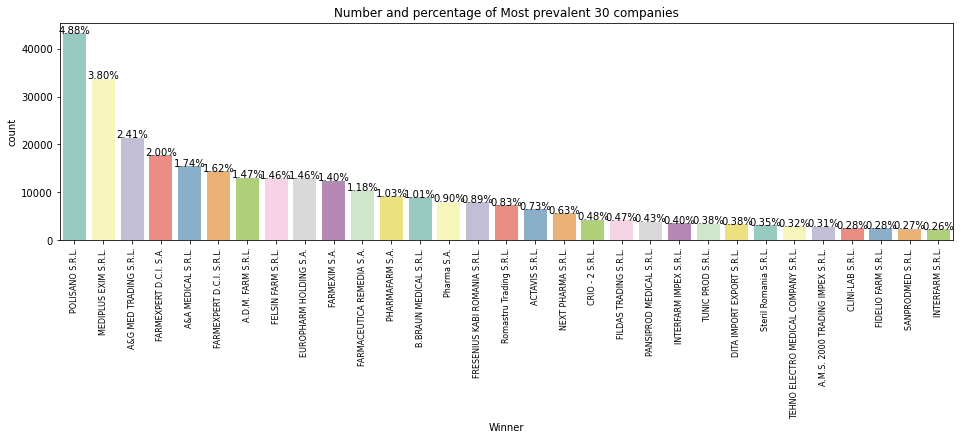

In [7]:
plot_count("Winner", "Most prevalent 30 companies", data_df, size=4)

Two companies, Polisano S.R.L and Mediplus Exim S.R.L. were winning each over 30,000 contracts. Both are companies active in Health. Actuall, all companies ranked on first 15 places are active in Health industry.

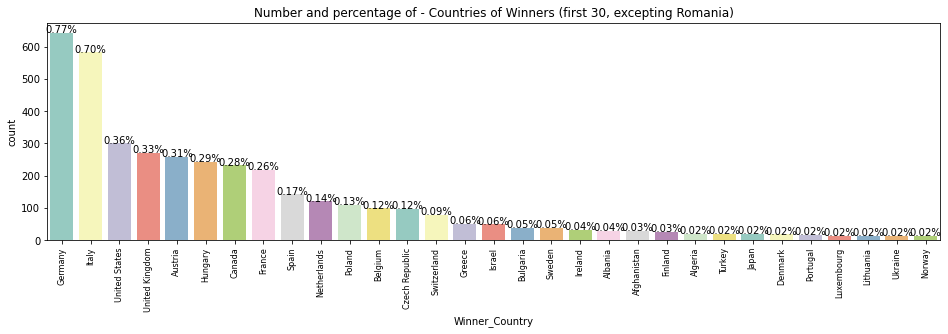

In [8]:
plot_count("Winner_Country", "- Countries of Winners (first 30, excepting Romania)", data_df.loc[data_df.Winner_Country!="Romania"], size=4)

Let's also show countries distribution using a map view.

In [9]:
country_codes_df = pd.read_csv(os.path.join("/kaggle", "input", "iso-country-codes-global", "wikipedia-iso-country-codes.csv"))

In [10]:
country_codes_df.columns = ['Winner_Country', 'C2', 'C3', 'numeric', 'iso']
data_sel_df = data_df.merge(country_codes_df, on="Winner_Country")

In [11]:
data_sel = data_sel_df.groupby(["Winner_Country", "C3"])["Value_RON"].agg(["sum", "count"])
data_sel_df = pd.DataFrame(data_sel).reset_index()
data_sel_df.columns = ["Country", "C3", "Total", "Number"]

In [12]:
import plotly.express as px

def plot_animated_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"Country: {row['Country']}\
        <br>Total amount: {row['Total']}\
        <br>Number contracts: {row['Number']}\
        <br>country code: {row['C3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="C3",
                        hover_name='hover_text',
                        color="Total",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=600, height=600)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title)
    fig.show() 

In [13]:
plot_animated_map(data_sel_df, "Total value and number of contracts / country")

In [14]:
data_sel2_df = data_sel_df.loc[~(data_sel_df.Country == "Romania")].copy()
plot_animated_map(data_sel2_df, "Total value and number of contracts / country (except Romania)")

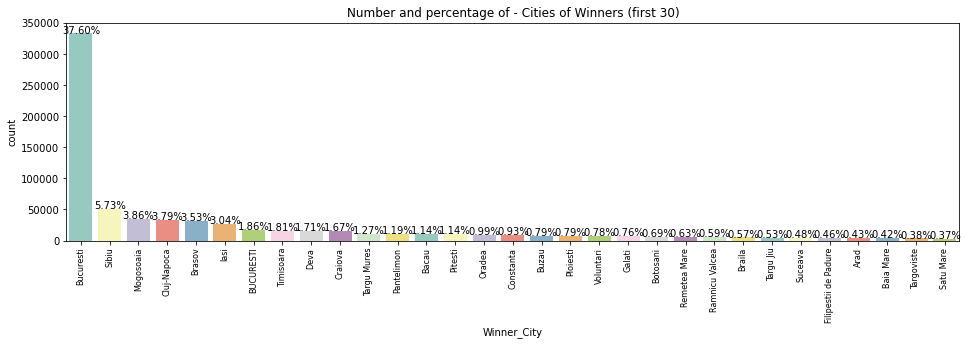

In [15]:
plot_count("Winner_City", "- Cities of Winners (first 30)", data_df, size=4)

The reason so many companies have address in Bucharest is because, although the activity is in various parts of the country, especially large companies would have the registered address in the capital city of Romania, Bucharest (Bucuresti in Romanian language).
We observe as well the two different writings for Bucuresti, with uppercase and regular.

Most of the cities apearing in the top 30 are large municipalities but we also spot some small municipalities that are in the metropolitan area of Bucharest:
* Mogosoaia  
* Pantelimon    
* Voluntari  

Also Remetea and Filipestii de Padure are small municipalities, in different areas of the country.

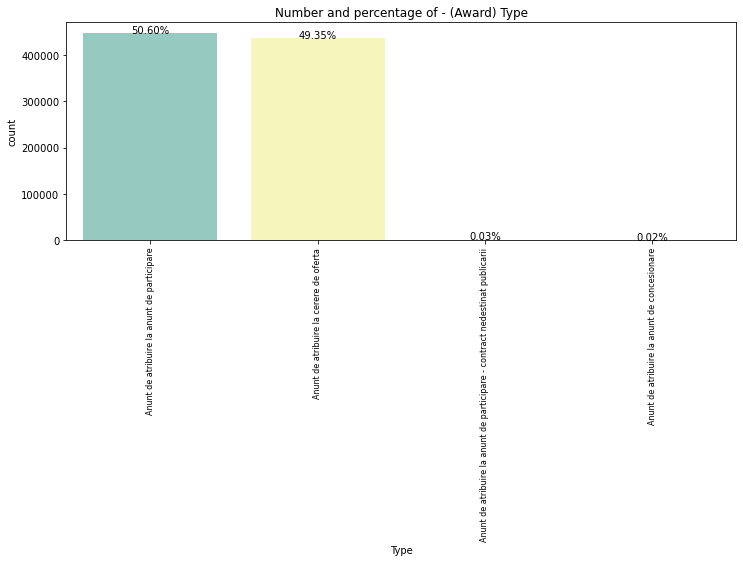

In [16]:
plot_count("Type", "- (Award) Type", data_df, size=3)

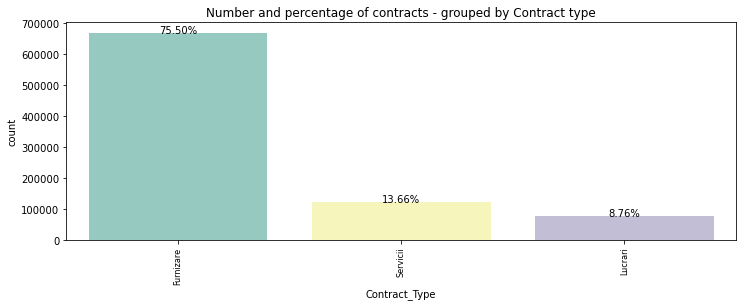

In [17]:
plot_count("Contract_Type", "contracts - grouped by Contract type", data_df, size=3)

Most of the contracts are for Supply, and next for Services. Only 8.76% are for Works. These are the number of contracts, not the amounts.

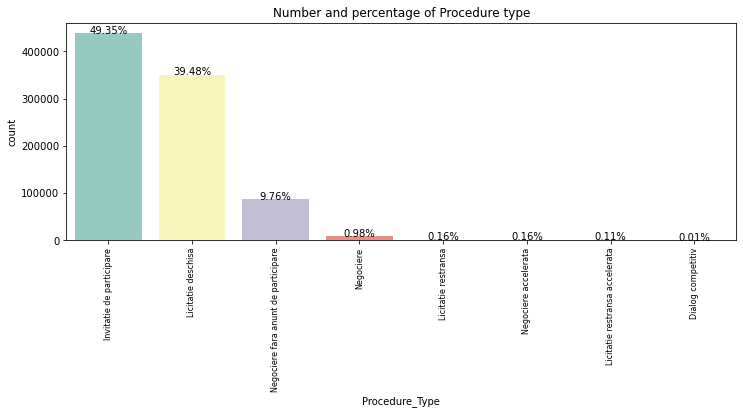

In [18]:
plot_count("Procedure_Type", "Procedure type", data_df, size=3)

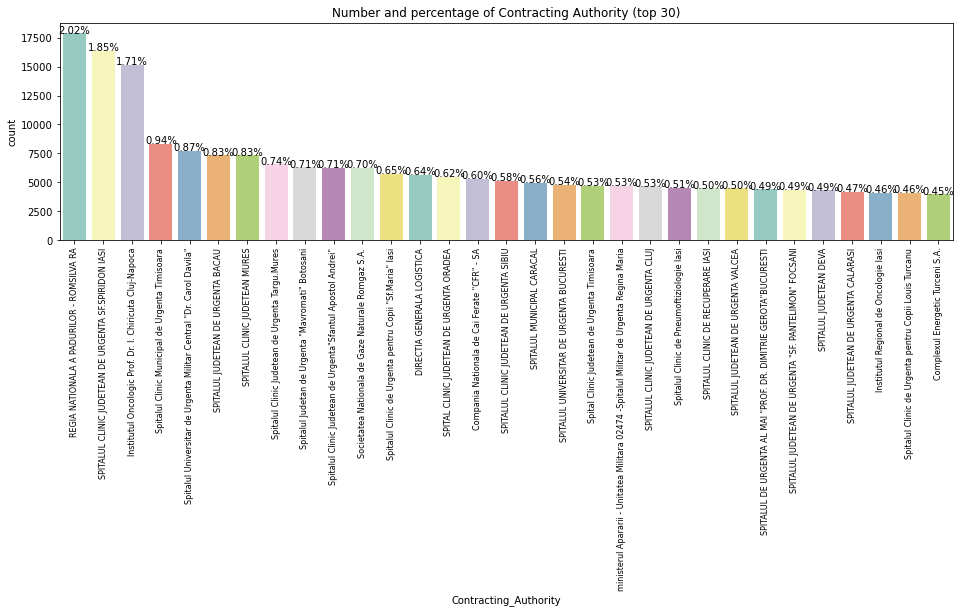

In [19]:
plot_count("Contracting_Authority", "Contracting Authority (top 30)", data_df, size=4)

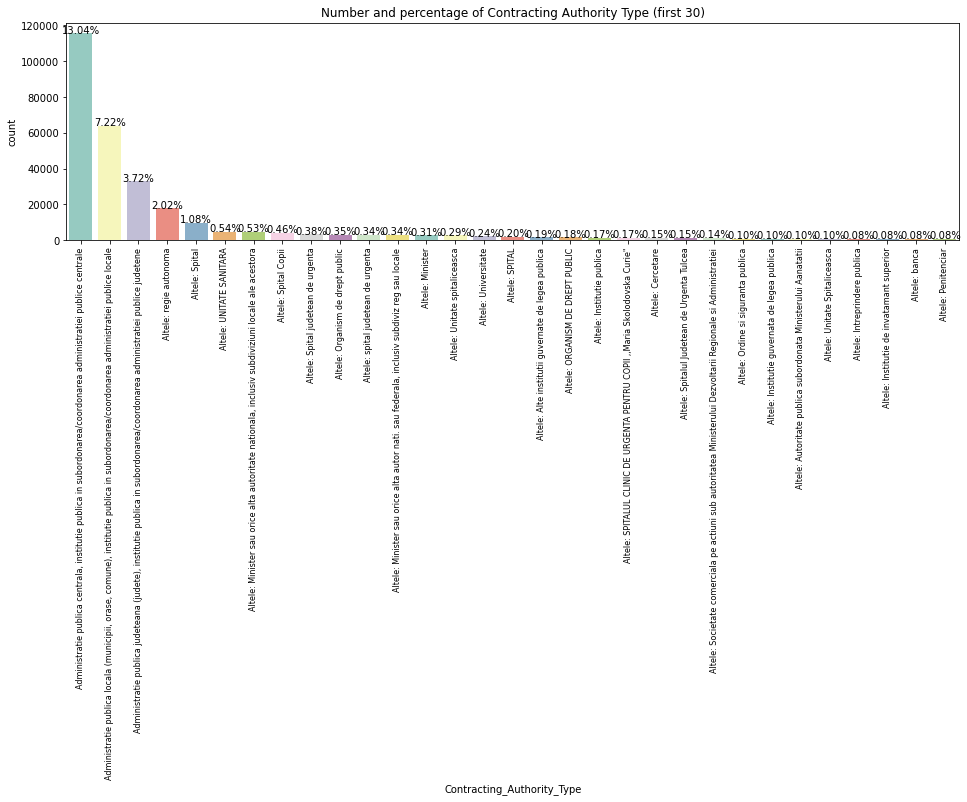

In [20]:
plot_count("Contracting_Authority_Type", "Contracting Authority Type (first 30)", data_df, size=4)

The first 3 position are contracting authorities from central, municipal or county public administrations.

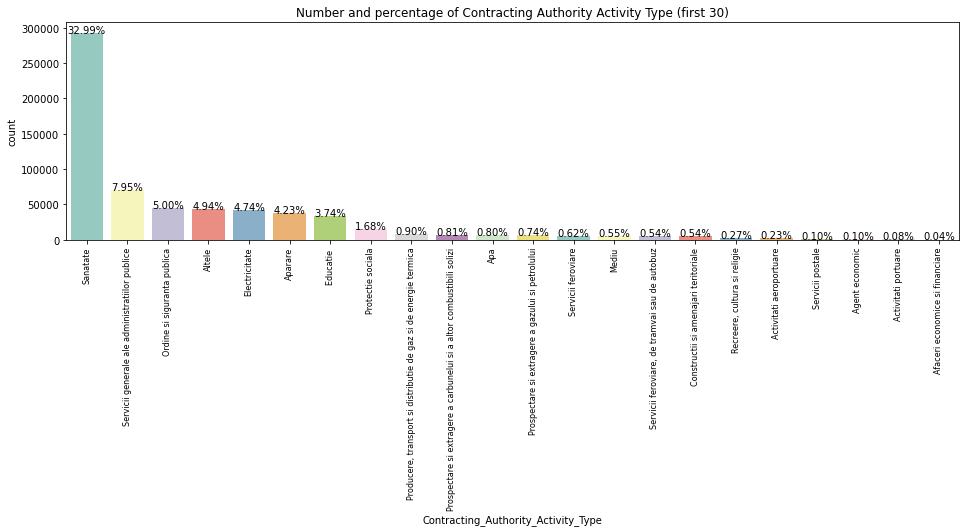

In [21]:
plot_count("Contracting_Authority_Activity_Type", "Contracting Authority Activity Type (first 30)", data_df, size=4)

As we expected, first 33% of the contracts are in Health, followed by General services for the public administrations, Order and public safety (Internal ministry), as well as Electricity, Agriculture, Defence, Education, Social policies. These are the number of contracts, not the value of contract.

Let's look now to values aggregated per year.

In [22]:
data_df[["Award_Announcement_Date"]].head()

,Award_Announcement_Date
0,2007-09-17 10:18:49.187
1,2007-09-17 10:18:49.187
2,2007-11-28 01:30:00.800
3,2007-08-23 13:52:48.017
4,2007-08-06 16:00:14.820


Let's check the data type.

In [23]:
type(data_df["Award_Announcement_Date"][0])

str

We will need to convert to date.

In [24]:
from datetime import datetime
data_df["Award_Announcement_Date"] = data_df["Award_Announcement_Date"].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

In [25]:
data_df["Award_Announcement_Year"] = data_df["Award_Announcement_Date"].dt.year
data_df["Award_Announcement_Month"] = data_df["Award_Announcement_Date"].dt.month

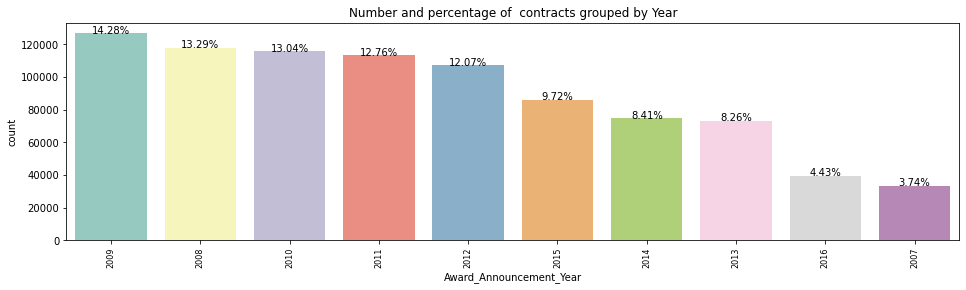

In [26]:
plot_count("Award_Announcement_Year", " contracts grouped by Year", data_df, size=4)

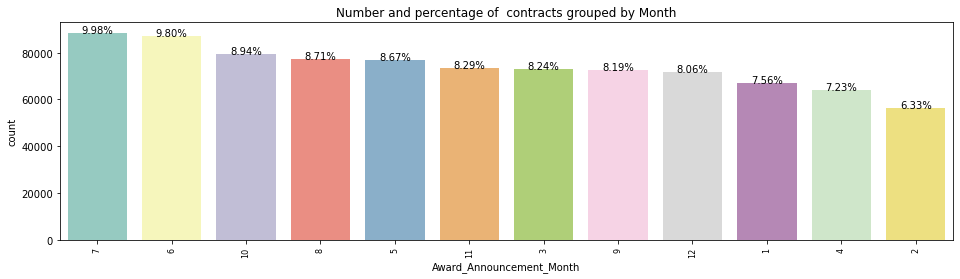

In [27]:
plot_count("Award_Announcement_Month", " contracts grouped by Month", data_df, size=4)

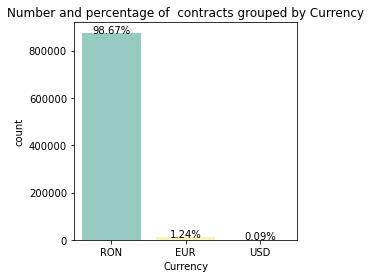

In [28]:
plot_count("Currency", " contracts grouped by Currency", data_df, size=1)

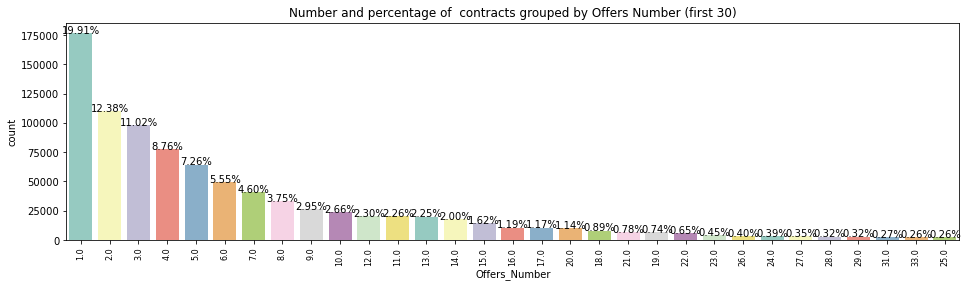

In [29]:
plot_count("Offers_Number", " contracts grouped by Offers Number (first 30)", data_df, size=4)

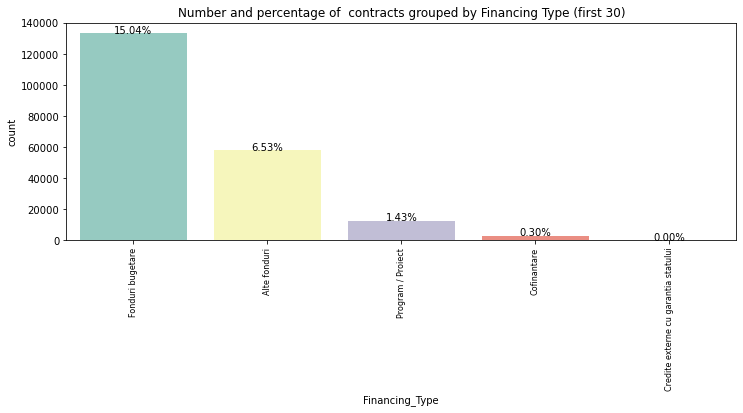

In [30]:
plot_count("Financing_Type", " contracts grouped by Financing Type (first 30)", data_df, size=3)

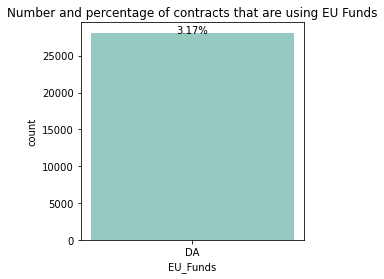

In [31]:
plot_count("EU_Funds", "contracts that are using EU Funds", data_df, size=1)

Only 3.7% of the contracts are using EU Funds. Let's see what type of EU Funds these contracts were using.

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 150 missing from current font.

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 150 missing from current font.



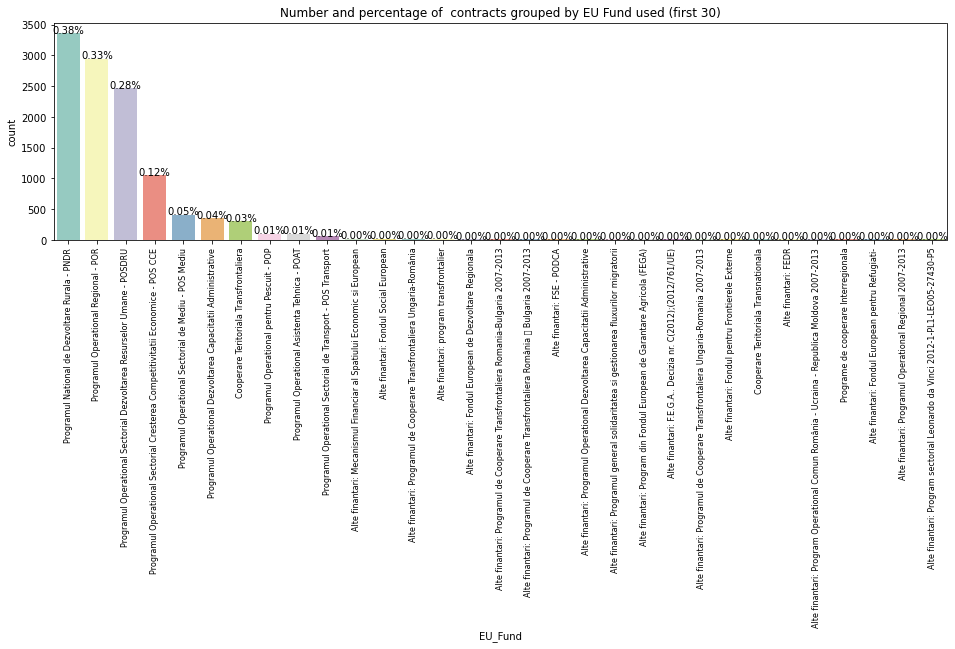

In [32]:
plot_count("EU_Fund", " contracts grouped by EU Fund used (first 30)", data_df, size=4)

Majority of contracts are using the National Programe for Rural Development.

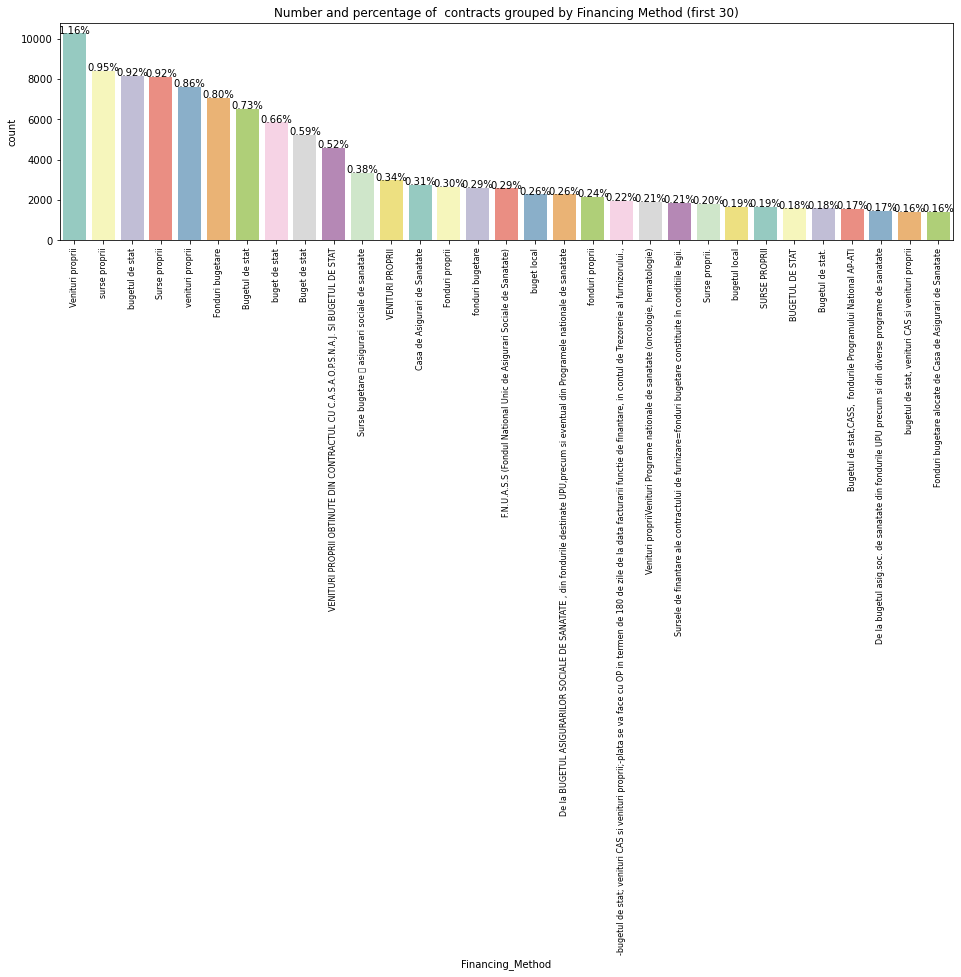

In [33]:
plot_count("Financing_Method", " contracts grouped by Financing Method (first 30)", data_df, size=4)

Here we observe that the Financial method should have been cleaned, because there are multiple different writings for the same value, for example for "Own funds" are at least 5 different writings.

Let's aggregate the data per year.

In [34]:
agg_data = data_df.groupby(["Winner", "Winner_Country", "Award_Announcement_Year", "Contracting_Authority_Activity_Type"])["Value_RON"].agg(["sum", "count"])

In [35]:
agg_data_df = pd.DataFrame(agg_data).reset_index()
agg_data_df.columns = ["Winner", "Winner Country", "Year", "Activity Type", "Total", "Count"]

Let's look to top 10 companies by total per year or number of contracts per year.

In [36]:
agg_data_df.sort_values(by=["Total"], ascending=False).head(10)

,Winner,Winner Country,Year,Activity Type,Total,Count
74813,S.C. DARCONS S.R.L,Romania,2015,Servicii generale ale administratiilor publice,3.462385e+09,1
34652,FARMEXPERT D.C.I. S.R.L.,Romania,2015,Sanatate,2.027201e+09,3356
27906,Diamond Offshore Netherlands B.V.,Netherlands,2013,Prospectare si extragere a gazului si petrolului,1.787626e+09,1
51015,MEDIPLUS EXIM S.R.L.,Romania,2015,Sanatate,1.725824e+09,2598
1725,AEDIFICIA CARPATI S.A.,Romania,2016,Altele,1.686871e+09,2
76498,S.C. Expert Petroleum SRL (Înregistrat in Regi...,Romania,2012,Prospectare si extragere a gazului si petrolului,1.391287e+09,1
3355,ALPINE BAU GmbH,Romania,2013,Servicii feroviare,1.255756e+09,1
128722,STRACO GRUP S.R.L.,Romania,2013,Servicii feroviare,1.255756e+09,1
34728,FCC CONSTRUCCION S.A.,Romania,2013,Servicii feroviare,1.255756e+09,1
8108,AZVI S.A.,Spain,2013,Servicii feroviare,1.255756e+09,1


The top 3 is in 3 different domains:
* General services of the public administration, with a Romanian company, in 2015 (and one unique, 3.5 B RON)  
* Health, with one Romanian company, with over 2B RON but also over 3000 contracts  
* Prospections and extraction of gas and oil, with a Netherlands company, and one unique contract.

The largest contract is actually one for railway services, 4 companies appears with the same amount in 2013, the total being more than 5 Billion RON; there are 3 Romanian companies and one Spanish, each with 1.25 Billion RON.

Let's also look to the top 10 companies by number of contracts, grouped by year.

In [37]:
agg_data_df.sort_values(by=["Count"], ascending=False).head(10)

,Winner,Winner Country,Year,Activity Type,Total,Count
60386,POLISANO S.R.L.,Romania,2012,Sanatate,5.796463e+08,4716
60380,POLISANO S.R.L.,Romania,2011,Sanatate,3.462455e+08,4443
51000,MEDIPLUS EXIM S.R.L.,Romania,2011,Sanatate,3.993156e+08,3792
34652,FARMEXPERT D.C.I. S.R.L.,Romania,2015,Sanatate,2.027201e+09,3356
51004,MEDIPLUS EXIM S.R.L.,Romania,2012,Sanatate,6.162929e+08,3222
60397,POLISANO S.R.L.,Romania,2015,Sanatate,1.079598e+09,3170
34633,FARMEXPERT D.C.I. S.A.,Romania,2012,Sanatate,3.549890e+08,3112
60394,POLISANO S.R.L.,Romania,2014,Sanatate,1.046188e+09,3069
336,A&G MED TRADING S.R.L.,Romania,2011,Sanatate,9.870915e+07,3056
60376,POLISANO S.R.L.,Romania,2010,Sanatate,1.191939e+08,3053


Polisano appears in allmost all the years with the largest number of contracts, and the rest of the companies are as well active in Health.



### Total amount and number of contracts aggregated per year and activity type


Let's look now to the aggregated totals and number of contracts per year and activity type.

In [38]:
agg2_data = data_df.groupby(["Award_Announcement_Year", "Contracting_Authority_Activity_Type"])["Value_RON"].agg(["sum", "count"])

In [39]:
agg2_data_df = pd.DataFrame(agg2_data).reset_index()
agg2_data_df.columns = ["Year", "Activity Type", "Total", "Count"]
agg2_data_df.head()

,Year,Activity Type,Total,Count
0,2007,Activitati aeroportuare,1.250445e+08,90
1,2007,Activitati portuare,6.305225e+07,54
2,2007,Afaceri economice si financiare,8.940602e+06,40
3,2007,Agent economic,3.796758e+06,22
4,2007,Altele,1.339682e+09,2311


In [40]:
agg2_data_df.sort_values(by=["Total"], ascending=False).head(10)

,Year,Activity Type,Total,Count
174,2014,Servicii generale ale administratiilor publice,2.165262e+10,4597
196,2015,Servicii generale ale administratiilor publice,1.754946e+10,5165
193,2015,Sanatate,1.472606e+10,31652
108,2011,Servicii generale ale administratiilor publice,1.371099e+10,7619
130,2012,Servicii generale ale administratiilor publice,1.233818e+10,5880
64,2009,Servicii generale ale administratiilor publice,1.194823e+10,11661
152,2013,Servicii generale ale administratiilor publice,1.143443e+10,5009
86,2010,Servicii generale ale administratiilor publice,1.064382e+10,8722
42,2008,Servicii generale ale administratiilor publice,1.001006e+10,15474
188,2015,"Producere, transport si distributie de gaz si ...",9.562503e+09,726


The top 10 is dominated by **General services of public administration** activity domain, with the amounts in 2014 and 2015 exceeding 20 Billion and respectivelly 17 Billion RON, and with a number of contracts of 4597 and 5165, respectively, followed by Health, with 14.5 Billion RON in 2015, and 31K contracts. The large number of contracts in Health is due to the legislation, that allows the hospitals to negotiate individually the acquisitions contracts. This is not preventing the large companies to dominate the market. 

In [41]:
agg2_data_df.sort_values(by=["Count"], ascending=False).head(10)

,Year,Activity Type,Total,Count
105,2011,Sanatate,3.981769e+09,42761
127,2012,Sanatate,5.777349e+09,42356
61,2009,Sanatate,2.072535e+09,40148
83,2010,Sanatate,2.154623e+09,39359
193,2015,Sanatate,1.472606e+10,31652
171,2014,Sanatate,8.040817e+09,26391
149,2013,Sanatate,4.408907e+09,26161
39,2008,Sanatate,1.582773e+09,24043
42,2008,Servicii generale ale administratiilor publice,1.001006e+10,15474
215,2016,Sanatate,2.614742e+09,14187


In top 10, 9/10 activity types are Health, as expected, with a maximum number of contracts 42,761 in 2011.


Let's look now to the graphs foramount and number of contracts evolution in time (aggregated per year and activity type).

In [42]:
def plot_time_variation(df, y='Total', hue='Activity Type', size=1, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    groups = df[hue].unique()
    
    for group in groups:
        df_ = df[(df[hue]==group)] 
        g = sns.lineplot(x="Year", y=y, data=df_,  label=group)  
        ax.text(max(df_['Year']), (df_.loc[df_['Year']==max(df_['Year']), y]), str(group))
    plt.xticks(rotation=90)
    plt.title(f'{y} grouped by {hue}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

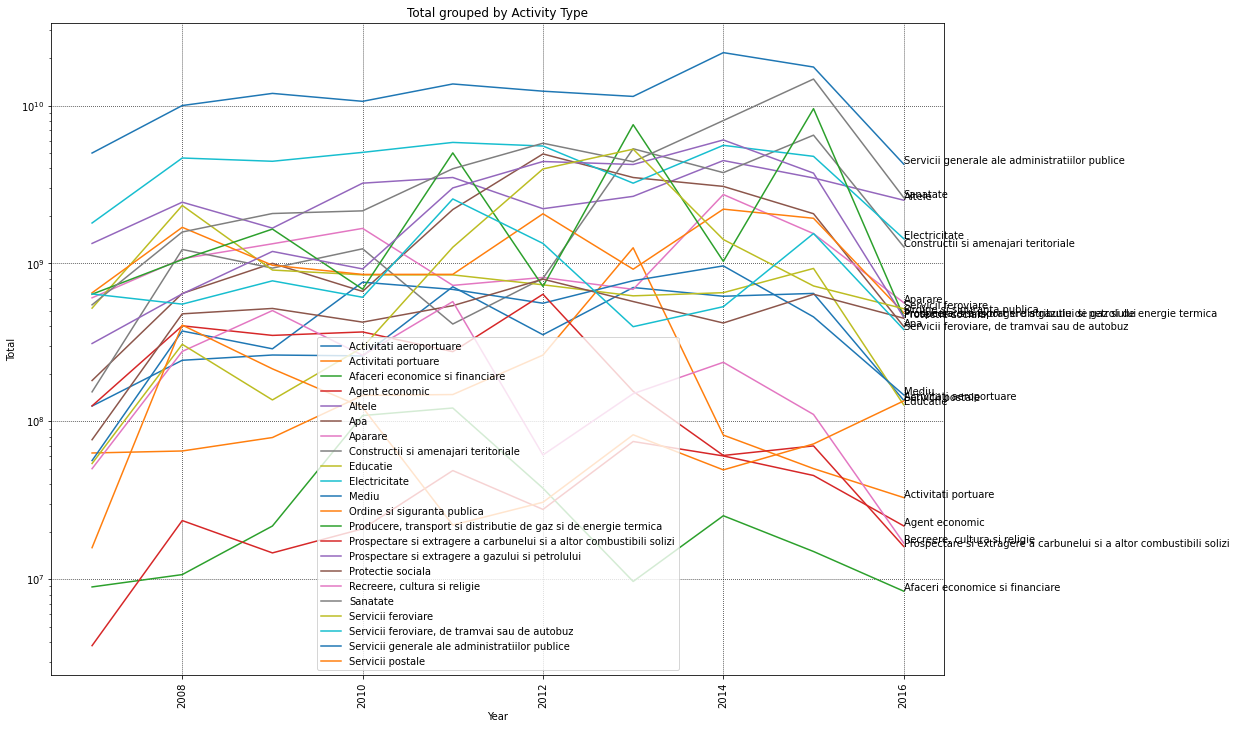

In [43]:
plot_time_variation(agg2_data_df, 'Total', 'Activity Type', 4, True)

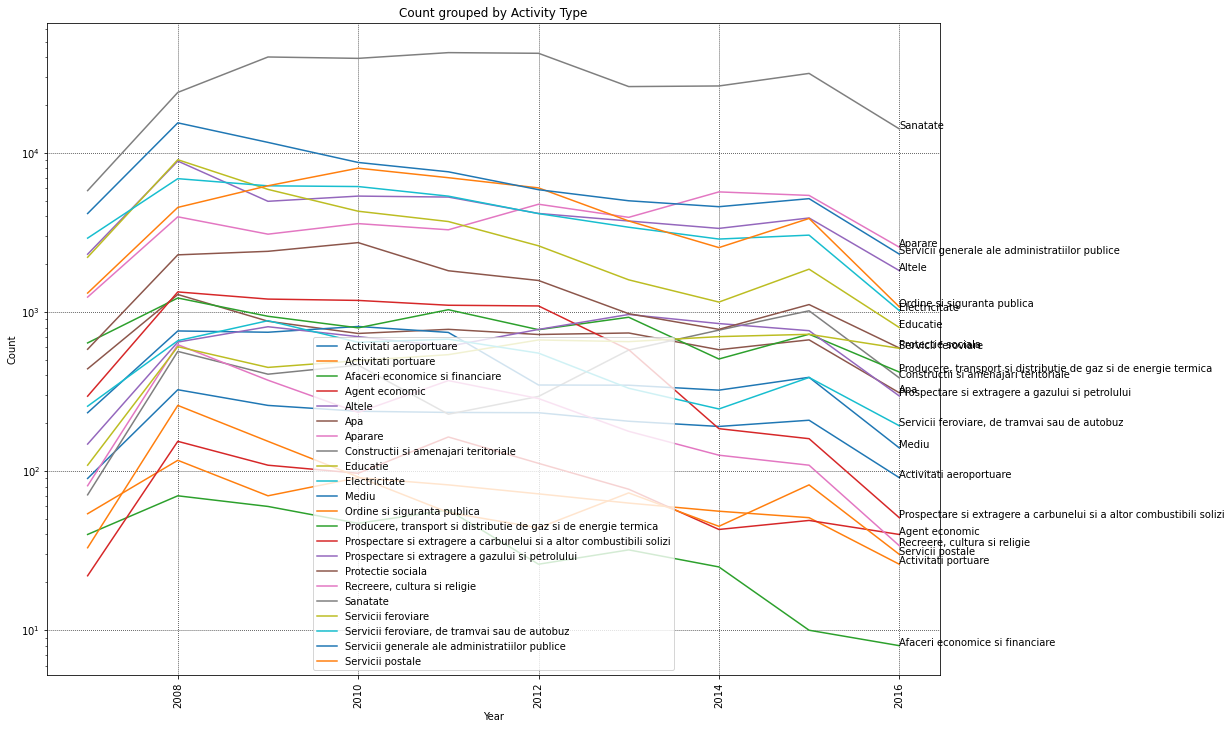

In [44]:
plot_time_variation(agg2_data_df, 'Count', 'Activity Type', 4, True)

We can show the same with heatmaps.

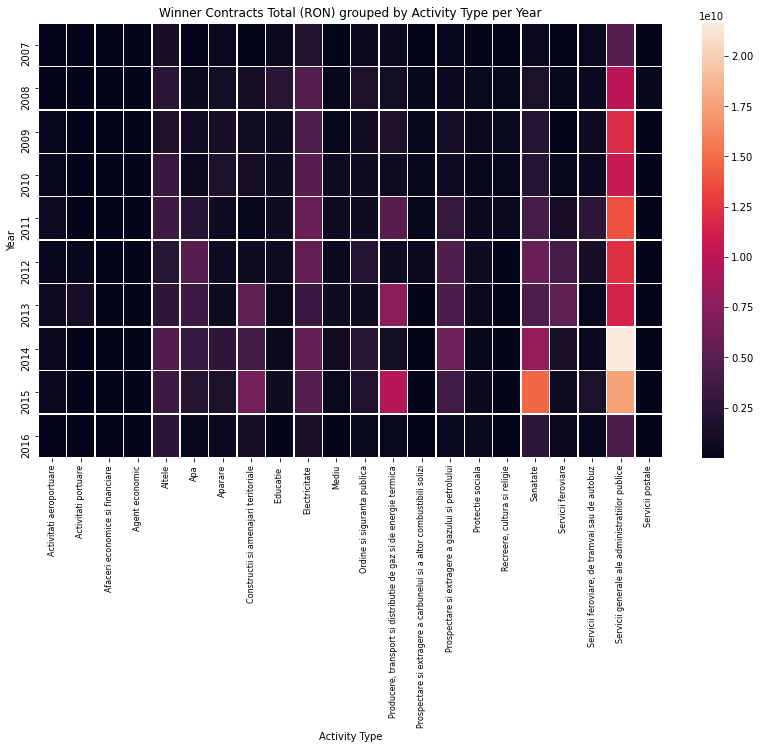

In [45]:
heatmap = agg2_data_df.pivot("Year", "Activity Type", 'Total')
fig, ax = plt.subplots(nrows=1,figsize=(14,8))
sns.heatmap(heatmap, linewidths=.5)
plt.title("Winner Contracts Total (RON) grouped by Activity Type per Year")
plt.xticks(rotation=90, size=8)

plt.show()

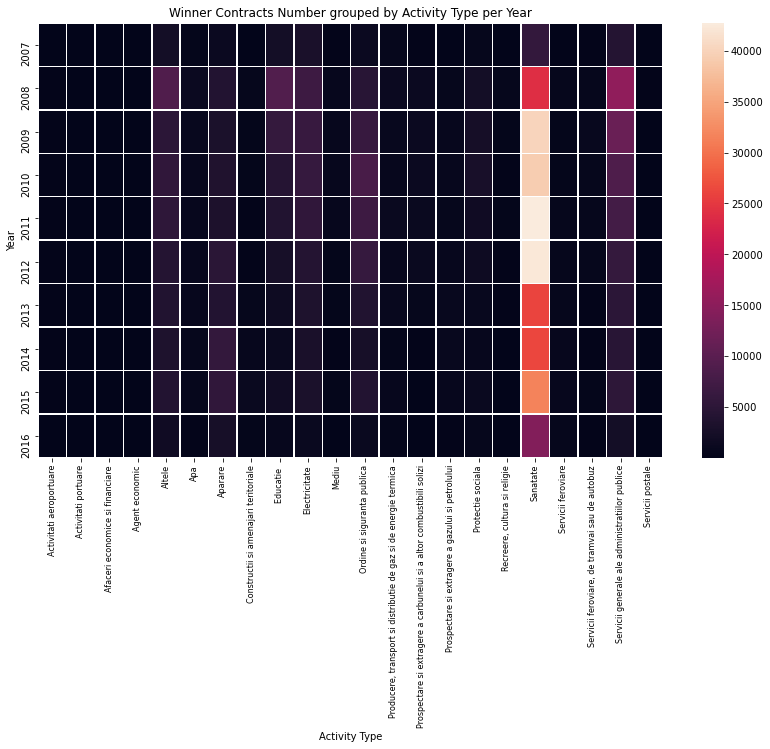

In [46]:
heatmap = agg2_data_df.pivot("Year", "Activity Type", 'Count')
fig, ax = plt.subplots(nrows=1,figsize=(14,8))
sns.heatmap(heatmap, linewidths=.5)
plt.title("Winner Contracts Number grouped by Activity Type per Year")
plt.xticks(rotation=90, size=8)

plt.show()

Let's show now an animated plot of yearly evolution of total amounts and number of contracts, gruped by Activity Type.

In [47]:
filtered_agg_data_df = agg2_data_df.loc[agg2_data_df.Total>1]
filtered_agg_data_df.shape

(220, 4)

In [48]:
import plotly.express as px
fig = px.scatter(filtered_agg_data_df, x='Total', y='Count', color='Activity Type', size='Total', size_max = 50,
                hover_name='Activity Type', log_x=True, animation_frame='Year',
                 title="Winner contract numbers vs. total amount grouped by Activity Type, per year",
                 animation_group='Activity Type', range_x=[1, 70000000000], range_y=[-5000, 50000],
                width=800, height=800)
fig.update_layout(legend=dict(orientation="h",  yanchor="bottom", y=-1, xanchor="right", x=1, font=dict(family="Courier", size=12,color="black")))
fig.show()

### European Union (EU) Funds

A small part of the awarded contracts are for EU Funds. We will show now the 


In [49]:
agg3_data = data_df.groupby(["Award_Announcement_Year", "EU_Fund"])["Value_RON"].agg(["sum", "count"])
agg3_data_df = pd.DataFrame(agg3_data).reset_index()
agg3_data_df.columns = ["Year", "EU Fund", "Total", "Count"]
agg3_data_df.head()

,Year,EU Fund,Total,Count
0,2011,Alte finantari: (PO de Cooperare transfrontali...,3990962.55,1
1,2011,Alte finantari: (Programul Operational de Coop...,6613263.00,1
2,2011,Alte finantari: (Programul de Cooperare Transf...,136019.00,1
3,2011,Alte finantari: (Programul de cooperare transf...,65856.00,1
4,2011,Alte finantari: -Fondurile Structurale ale Uni...,142307.11,1


Let's look to the top 10 for these EU Funds granted per year, ordered by total amount.

In [50]:
agg3_data_df.sort_values(by=["Total"], ascending=False).head(10)

,Year,EU Fund,Total,Count
326,2012,Programul Operational Regional - POR,2.517385e+09,818
439,2013,Programul National de Dezvoltare Rurala - PNDR,2.117548e+09,627
323,2012,Programul National de Dezvoltare Rurala - PNDR,1.610112e+09,507
534,2015,Programul National de Dezvoltare Rurala - PNDR,1.354239e+09,886
491,2014,Programul National de Dezvoltare Rurala - PNDR,1.249898e+09,809
172,2011,Programul National de Dezvoltare Rurala - PNDR,1.240480e+09,392
442,2013,Programul Operational Regional - POR,1.220681e+09,633
494,2014,Programul Operational Regional - POR,1.036359e+09,501
537,2015,Programul Operational Regional - POR,6.798218e+08,486
497,2014,Programul Operational Sectorial de Mediu - POS...,6.362477e+08,54


In terms of the amounts, the top 10 is dominated by 2 EU Operational Funds:

* Regional Operational Program  (1st position, with 2.5 Billion, in 2012 and 4 positions in top 10)  
* National Program for Rural Development  (2nd and 3rd position, with 2.1 and 1.6 Billion, in 2013 and 2012, respectively, and 5 positions in top 10)  


In [51]:
agg3_data_df.sort_values(by=["Count"], ascending=False).head(10)

,Year,EU Fund,Total,Count
177,2011,Programul Operational Sectorial Dezvoltarea Re...,7.726798e+07,1002
534,2015,Programul National de Dezvoltare Rurala - PNDR,1.354239e+09,886
326,2012,Programul Operational Regional - POR,2.517385e+09,818
491,2014,Programul National de Dezvoltare Rurala - PNDR,1.249898e+09,809
328,2012,Programul Operational Sectorial Dezvoltarea Re...,5.477164e+07,648
442,2013,Programul Operational Regional - POR,1.220681e+09,633
439,2013,Programul National de Dezvoltare Rurala - PNDR,2.117548e+09,627
323,2012,Programul National de Dezvoltare Rurala - PNDR,1.610112e+09,507
494,2014,Programul Operational Regional - POR,1.036359e+09,501
537,2015,Programul Operational Regional - POR,6.798218e+08,486


In terms of number of contracts, the largest number of contracts is from POSDRU - Operational Sectorial Program for Human Resources Development (1002 contracts in 2011). Follws PNDR - National Program for Rural Development, with 886 contracts in 2015 and the Regional Operational Program, with 818 contracts in 2012.


Let's show an animation (per year) of the total and number of contracts, grouped per EU Fund.

In [52]:
agg3_data_df.Count.max(), agg3_data_df.Total.max()

(1002, 2517384665.529999)

In [53]:
import plotly.express as px
fig = px.scatter(agg3_data_df, x='Total', y='Count', color='EU Fund', size='Total', size_max = 50,
                hover_name='EU Fund', log_x=True, animation_frame='Year',
                 title="Winner contract numbers vs. total amount grouped by EU Fund, per year",
                 animation_group='EU Fund', range_x=[1, 5000000000], range_y=[-100, 1200],
                width=800, height=800)
fig.update_layout(showlegend=False)
fig.show()

#  <a id='4'>Conclusions</a>

The data represents the information about companies being awarded contracts following public tenders in Romania, from 2007 (the year of Romania's accession to EU) until 2016.

The data has 39 features, including winners companies information name, country, city, address, VAT), contracting public authority information, type of public tenders, of contracting authority, amounts and currencies, information about financing, subcontracting as well as if EU Funds were used (and which).

We observe different patterns about the time and activity type distribution, for example in Health there are a lot of contracts, while for Railway services or General services for local public authorities or for Aeroports services or for oil & gas there are few contracts, with large amounts.

